In [2]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

train = pd.DataFrame(pd.read_csv('train.csv'))
train.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


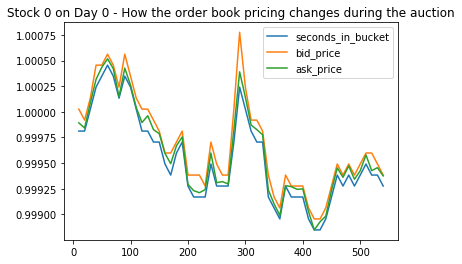

In [3]:
x = train.query('stock_id ==0 & date_id ==0')[['seconds_in_bucket','bid_price','ask_price', 'wap']].replace(0, np.nan).set_index('seconds_in_bucket')#.plot(title='Stock 0 on Day 0 - How the order book pricing changes during the auction')

plt.plot(x)
plt.title('Stock 0 on Day 0 - How the order book pricing changes during the auction')
plt.legend(['seconds_in_bucket','bid_price','ask_price', 'wap'])
plt.show()

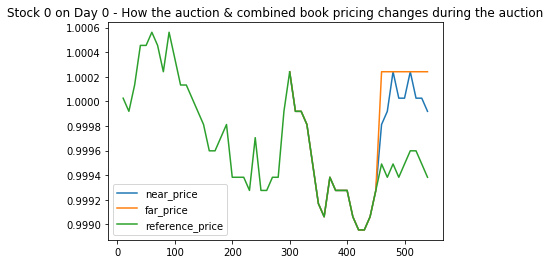

In [13]:
x = train.query('stock_id ==0 & date_id ==0')[['seconds_in_bucket','near_price','far_price','reference_price']].replace(0, np.nan).set_index('seconds_in_bucket')#.plot(title = 'Stock 0 on Day 0 - How the auction & combined book pricing changes during the auction')


plt.plot(x)
plt.title('Stock 0 on Day 0 - How the auction & combined book pricing changes during the auction')
plt.legend(['near_price','far_price','reference_price'])
plt.show()

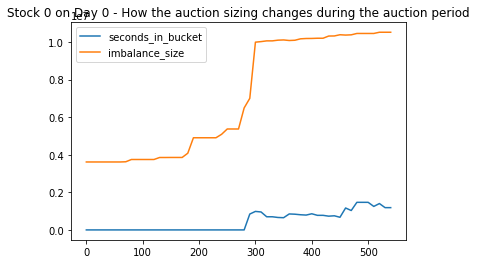

In [11]:
x = train.query('stock_id ==5 & date_id ==5')[['seconds_in_bucket','imbalance_size','matched_size']].set_index('seconds_in_bucket')#.plot(title='Stock 0 on Day 0 - How the auction sizing changes during the auction period')


plt.plot(x)
plt.title('Stock 0 on Day 0 - How the auction sizing changes during the auction period')
plt.legend(['seconds_in_bucket','imbalance_size','matched_size'])
plt.show()

# Baseline Solutions

A simple baseline is to assume we have no valuable information about the direction any stock moves, which translates to a predicted value of 0 for all observations. This baseline is quite hard to beat in the context of financial markets.

However, we have some information in our dataset that should help us to beat this baseline. If we observe an auction imbalance, it indicates that at the current price there is buying or selling interest that will currently not get matched in the auction. We can therefore adjust our prediction upwards if there is a buy imbalance & downwards if there is a sell imbalance.

In [6]:
simple_mapping = {1: 0.1, 0: 0, -1: -0.1}

train['baseline_prediction'] = 0        # baseline prediction => No movement at close
train['simple_prediction'] = train['imbalance_buy_sell_flag'].map(simple_mapping) # A simple predition => movement dependent on imbalance direction
train[['imbalance_buy_sell_flag','baseline_prediction', 'simple_prediction']].head()

,imbalance_buy_sell_flag,baseline_prediction,simple_prediction
0,1,0,0.1
1,-1,0,-0.1
2,-1,0,-0.1
3,-1,0,-0.1
4,-1,0,-0.1


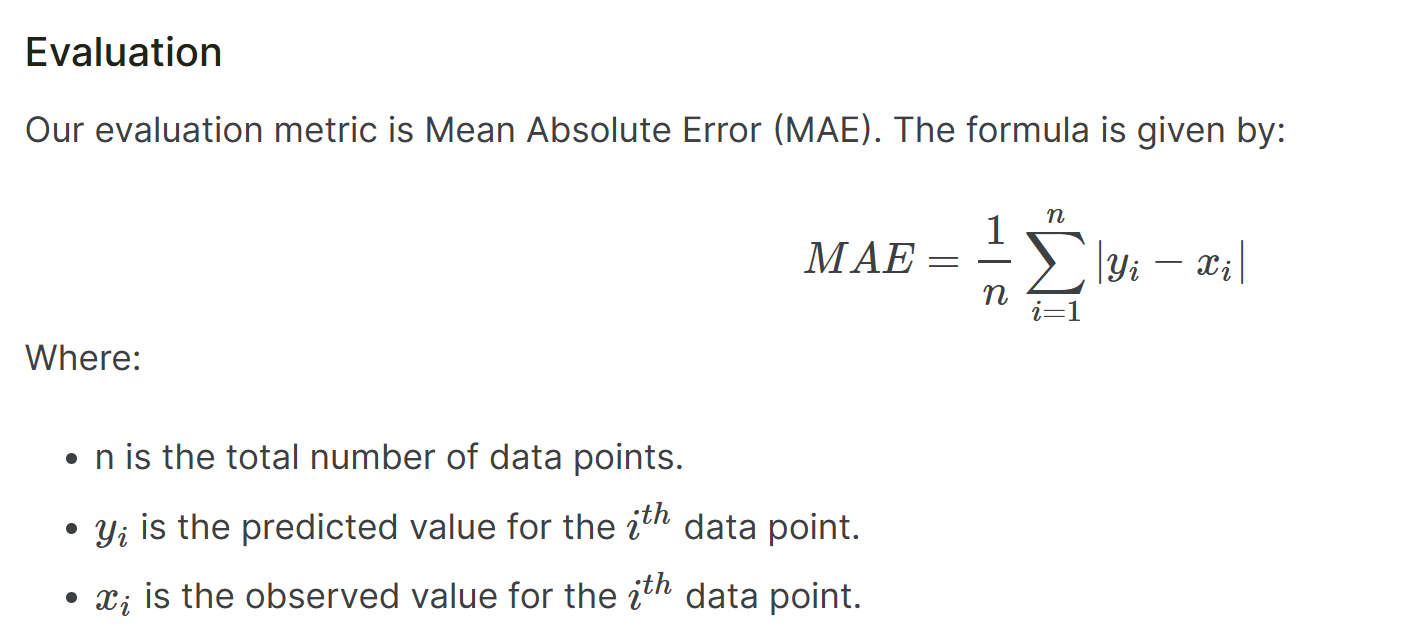

In [7]:
baseline_mae = (train['baseline_prediction'] - train['target']).abs().mean()
simple_prediction_mae = (train['simple_prediction'] - train['target']).abs().mean()

print(baseline_mae, simple_prediction_mae)
print('MAE improvement in basis points: ', (baseline_mae-simple_prediction_mae))

6.407770748114119 6.407056596611489
MAE improvement in basis points:  0.0007141515026303225
